In [1]:
import pickle
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

sys.path.append("../")
sys.path.append("../covid19_inference")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
import covid19_inference as cov19

In [2]:
""" Matplotlib config
"""
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams["figure.figsize"] = [3.4, 2.7]  # APS single column
matplotlib.rcParams["figure.dpi"] = 300  # this primarily affects the size on screen
#matplotlib.rcParams['axes.linewidth'] = 0.3
matplotlib.rcParams["axes.labelcolor"] = "black"
matplotlib.rcParams["axes.edgecolor"] = "black"
matplotlib.rcParams["xtick.color"] = "black"
matplotlib.rcParams["ytick.color"] = "black"
matplotlib.rcParams["xtick.labelsize"] = 8
matplotlib.rcParams["ytick.labelsize"] = 8
matplotlib.rcParams["axes.labelsize"] = 8
matplotlib.rcParams["axes.titlesize"]= 10
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["legend.title_fontsize"] = 8

""" Colors
Done with rcParams / see plot.rcParams
"""


""" General configs
"""
fig_path = "./figures"
# Save figure as pdf and png        
save_kwargs = {
    "transparent":True,
    "dpi":300,
    "bbox_inches":"tight"
}

In [3]:
%load_ext autoreload
%autoreload 2

## Load data/model

In [4]:
def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)
        
tune = 1000
draws = 2000
max_treedepth = 12
fstr=(f"/data.nst/jdehning/covid_uefa_traces11/UEFA"+
    f"-beta=False"+
    f"-country=Germany"+
    f"-offset_data=0"+
    f"-draw_delay=True"+
    f"-weighted_alpha_prior=0"+
    f"-prior_delay=-1"+
    f"-width_delay_prior=0.1"+
    f"-sigma_incubation=-1.0"+
    f"-median_width_delay=1.0"+
    f"-interval_cps=10.0"+
    f"-tune={tune}"+
    f"-draws={draws}"+
    f"-max_treedepth={max_treedepth}.pickled")
model, trace = load(fstr)
dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])

FileNotFoundError: [Errno 2] No such file or directory: '/data.nst/jdehning/covid_uefa_traces11/UEFA-beta=False-country=Germany-offset_data=0-draw_delay=True-weighted_alpha_prior=0-prior_delay=-1-width_delay_prior=0.1-sigma_incubation=-1.0-median_width_delay=1.0-interval_cps=10.0-tune=1000-draws=2000-max_treedepth=12.pickled'

We want to compare our computed mean effect of the uefa championship with the [Ranking the effectiveness of worldwide COVID-19 government interventions](https://www.nature.com/articles/s41562-020-01009-0) study.
Numbers taken from [table 1](https://www.nature.com/articles/s41562-020-01009-0/tables/1).




In [103]:
def calc_error(str_num):
    """
    Numbers in parentheses denote half of the amount by which the last digit of the corresponding number outside the parentheses fluctuates within the 95% confidence interval.
    TODO find CI that they plot in figure 1
    """
    ind_1 = str_num.find("(")
    ind_2 = str_num.find(")")
    
    if ind_1 == -1 or ind_2 == -1:
        return 0
    else:
        error = int(str_num[ind_1+1:ind_2])
        num = str_num[:ind_1].replace(" ","")
        decimals = num[::-1].find('.')
        return error*float(f"1e{-decimals}")*2
def convert_to_num(str_num):
    ind_1 = str_num.find("(")
    return float(str_num[:ind_1].replace(" ",""))
    
data_other_paper = pd.read_csv("../data/compare_s41562-020-01009-0_table1.csv",sep=',')
data_other_paper = data_other_paper.set_index("L2 category")
data_other_paper["R_add"] = data_other_paper[' Δ𝑅CC𝑡'].apply(convert_to_num)
data_other_paper["R_add_error"] = data_other_paper[' Δ𝑅CC𝑡'].apply(calc_error)

In [104]:
data_other_paper

,Score (%),Consensus,Δ𝑅CC𝑡,Δ𝑅LASSO𝑡,Importance (RF),Δ𝑅TF𝑡,R_add,R_add_error
L2 category,,,,,,,,
Small gathering cancellation,83,4,-0.35 (2),-0.22 (5),0.020 (2),-0.327 (3),-0.35,0.04
Closure of educational institutions,73,4,-0.16 (2),-0.21 (4),0.028 (2),-0.146 (2),-0.16,0.04
Border restriction,56,4,-0.23 (2),-0.12 (2),0.017 (2),-0.057 (2),-0.23,0.04
Increased availability of PPE,51,4,-0.11 (2),-0.13 (2),0.012 (1),-0.062 (2),-0.11,0.04
Individual movement restrictions,42,4,-0.13 (2),-0.08 (3),0.017 (2),-0.121 (2),-0.13,0.04
National lockdown,25,4,-0.14 (3),-0.09 (2),0.0020 (9),-0.008 (3),-0.14,0.06
Mass gathering cancellation,53,3,-0.33 (2),0,0.012 (1),-0.127 (2),-0.33,0.04
Educate and actively communicate with the public,48,3,-0.18 (4),0,0.018 (2),-0.276 (2),-0.18,0.08
The government provides assistance to vulnerable populations,41,3,-0.17 (3),-0.18 (4),0.009 (1),0.090 (3),-0.17,0.06


In [120]:
# Scenarios for plotting

model_labels = ["Soccer Championship","Small gathering cancellation","Closure of educational institutions","Border restriction"]

y = []
y_err = []
for label in model_labels:
    if label == "Soccer Championship":
        #TODO insert our number
        R_add = 0.1
        R_err = [0.02,0.02]
    else:
        R_add = data_other_paper.loc[label]["R_add"]*-1
        R_err = [data_other_paper.loc[label]["R_add_error"],data_other_paper.loc[label]["R_add_error"]]
    y.append(R_add)
    y_err.append(R_err)
y = np.array(y)
y_err = np.array(y_err)

## Plotting

In [142]:
from covid19_soccer.plot.utils import lighten_color
from matplotlib.colors import to_hex
def effect_mean(ax, labels, y, y_err, colors):
    
    # Plot vertical lines without connection
    lines = ax.vlines(
        x=labels,
        ymin=y-y_err[:,0],
        ymax=y+y_err[:,1],
        lw=3,
        colors=colors
    )
    
    lines.set_capstyle("round")
    # Plot horizontal lines at mean
    ax.scatter(
        x=labels,
        y=y,
        marker="o",
        s=20,
        zorder=10,
        c="white",
        edgecolor=colors,
    )
    
    # Markup
    ax.set_ylabel("$\sum \Delta R$")
    ax.set_xlim(-0.25,len(y)-0.75)
    ax.set_ylim(min(y)-y_err.max(),max(y)+y_err.max())
    ax.set_xticklabels(labels,rotation=45,ha='right')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return ax

/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


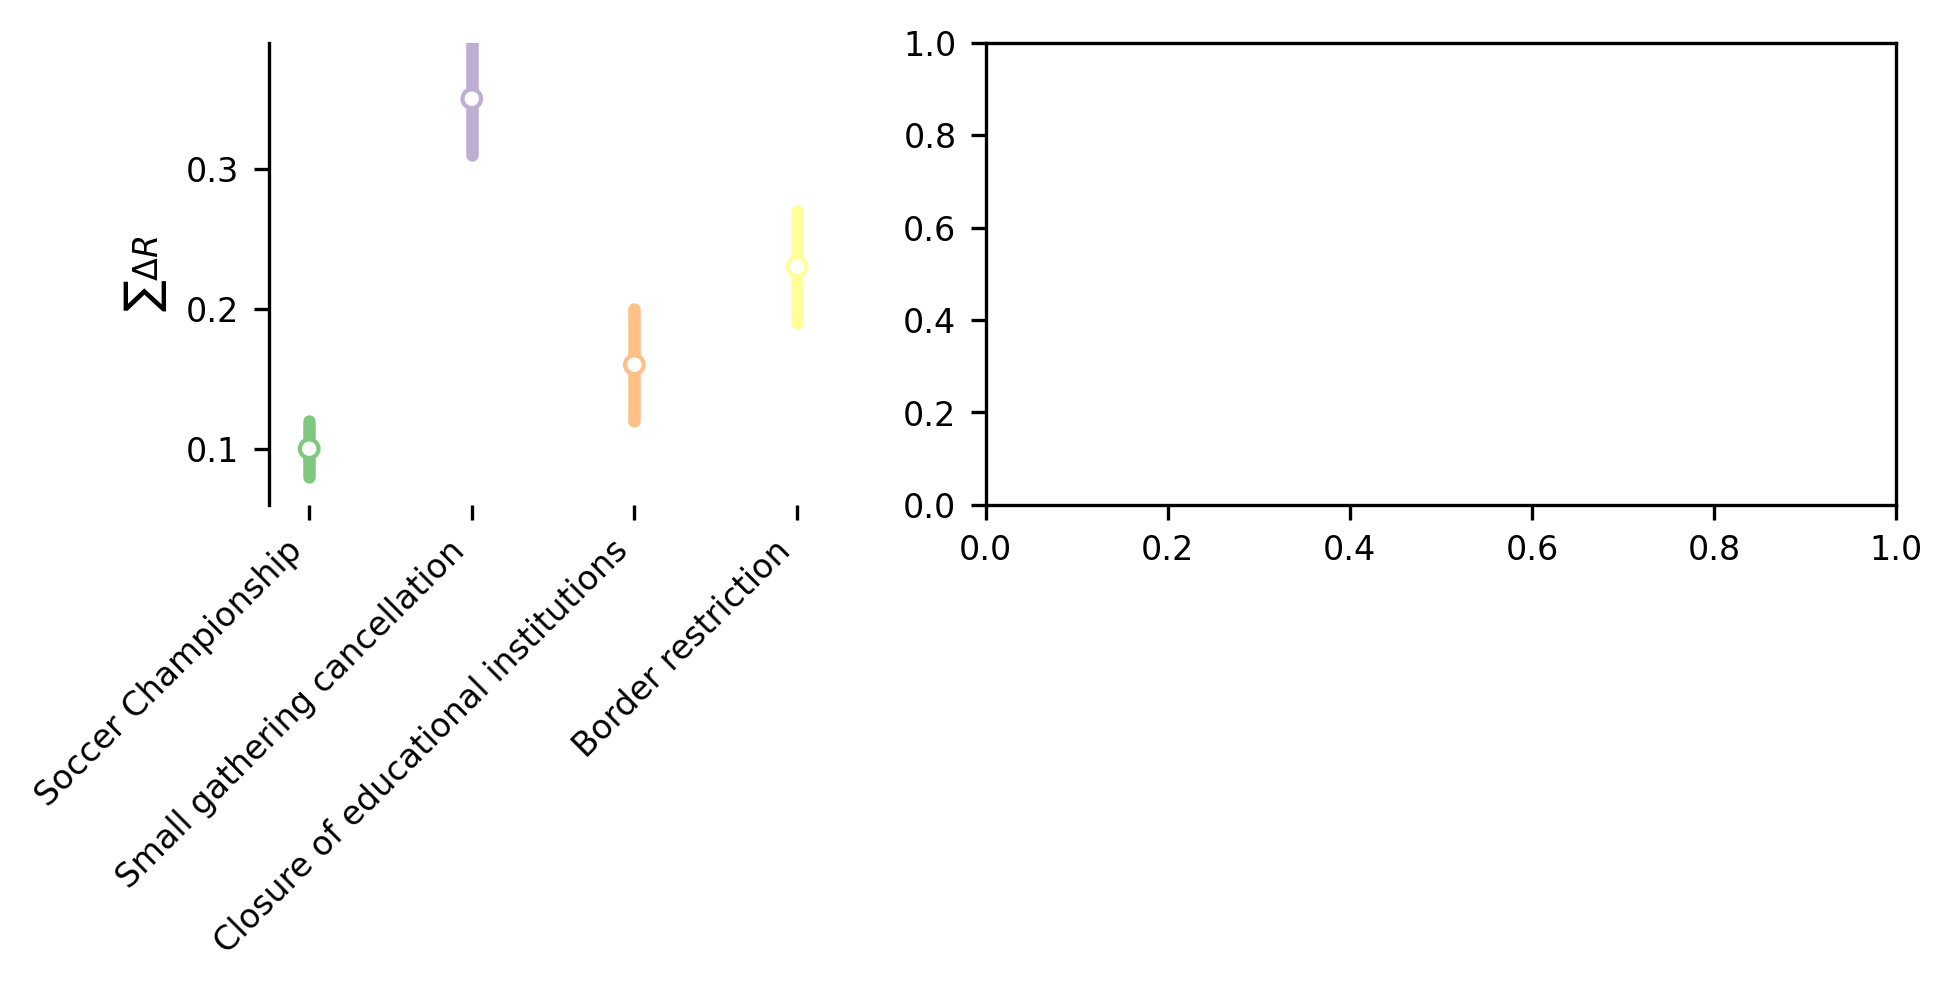

In [143]:
fig, axes = plt.subplots(1,2,figsize=(7,2.0),gridspec_kw={"width_ratios":[0.5,0.8,]})

# Colors
cmap = plt.get_cmap("Accent")
colors = [to_hex(cmap(i),keep_alpha=True) for i in range(len(y))]

# Plotting
labels = ["Soccer","Small\ngathering","Closure of\neducation","Border\nrestriction"]
lines = effect_mean(axes[0],model_labels,y,y_err,colors)

# Model plots
#for i,trace in enumerate(traces):
#    covid19_soccer.plot.timeseries.incidence(axes[1],trace,model,dl,color=colors[i])
    
fig.savefig(f"{fig_path}/what_if.pdf", **save_kwargs)
fig.savefig(f"{fig_path}/what_if.png", **save_kwargs)
plt.show()